# TalentMind1 project
Loop academy - datascience project

# import libs and load dataset

In [1]:
# connect drive to colab
from google.colab import drive
drive.mount('content/')
%cd /content/content/MyDrive/Colab_Notebooks

Mounted at content/
/content/content/MyDrive/Colab_Notebooks


# download dataset from kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle

In [ ]:
# original immo dataset

!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 96% 89.0M/93.0M [00:00<00:00, 127MB/s]
100% 93.0M/93.0M [00:00<00:00, 116MB/s]


In [ ]:
!kaggle datasets download -d alisharifi2000/talentmindphase1

talentmindphase1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip dataaset 
!unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
  inflating: immo_data.csv           


# import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
import sklearn.preprocessing as prep
from sklearn.model_selection import train_test_split

In [3]:
!ls

'abraham sedaghat (shohreh)_pg.pdf'	  LSTM_model
 ADP2305				  LSTM_model.data-00000-of-00001
 apartment-rental-offers-in-germany.zip   LSTM_model.index
 ASKModulator				  LSTM_S504.ipynb
 AudioAmplifire				  Multi-stageBuffer
 bufferdriver				 'multi stage buffer with transmission'
 checkpoint				  PWMmodulator
 cwrnn.py				  __pycache__
 DoubleBalanceMixer			  pyrenn.py
 Filter					  pyrenn_TA.ipynb
'Fraud detection project'		  RNN.ipynb
 FrequencyDouber_sine			  RNN_new.ipynb
 FrequencyDoubler_pulse			  sn1126
 FSKModulator				  SN1126Transmission
 GRU.ipynb				  sn540
 Images					  SquareWaveGenerator
 immo_data.csv				  talentmindphase1.zip
 Invereter				  TEST_MLP.ipynb
 kaggle.json				  TVRemote
 LSTM_FinalProject.ipynb		  unknown


In [4]:
dataset = pd.read_csv('./immo_data.csv', lineterminator='\n') 

In [5]:
dataset.head(20)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,...,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN,Feb20
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,...,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,...,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN,Feb20
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN,Feb20
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,NaN,NaN,NaN,NaN,Oct19


# describe dataset

In [6]:
dataset.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [8]:
dataset.duplicated().any()

False

In [9]:
nulls = dataset.isna().sum()

In [10]:
# normalize features
nulls /= 268850


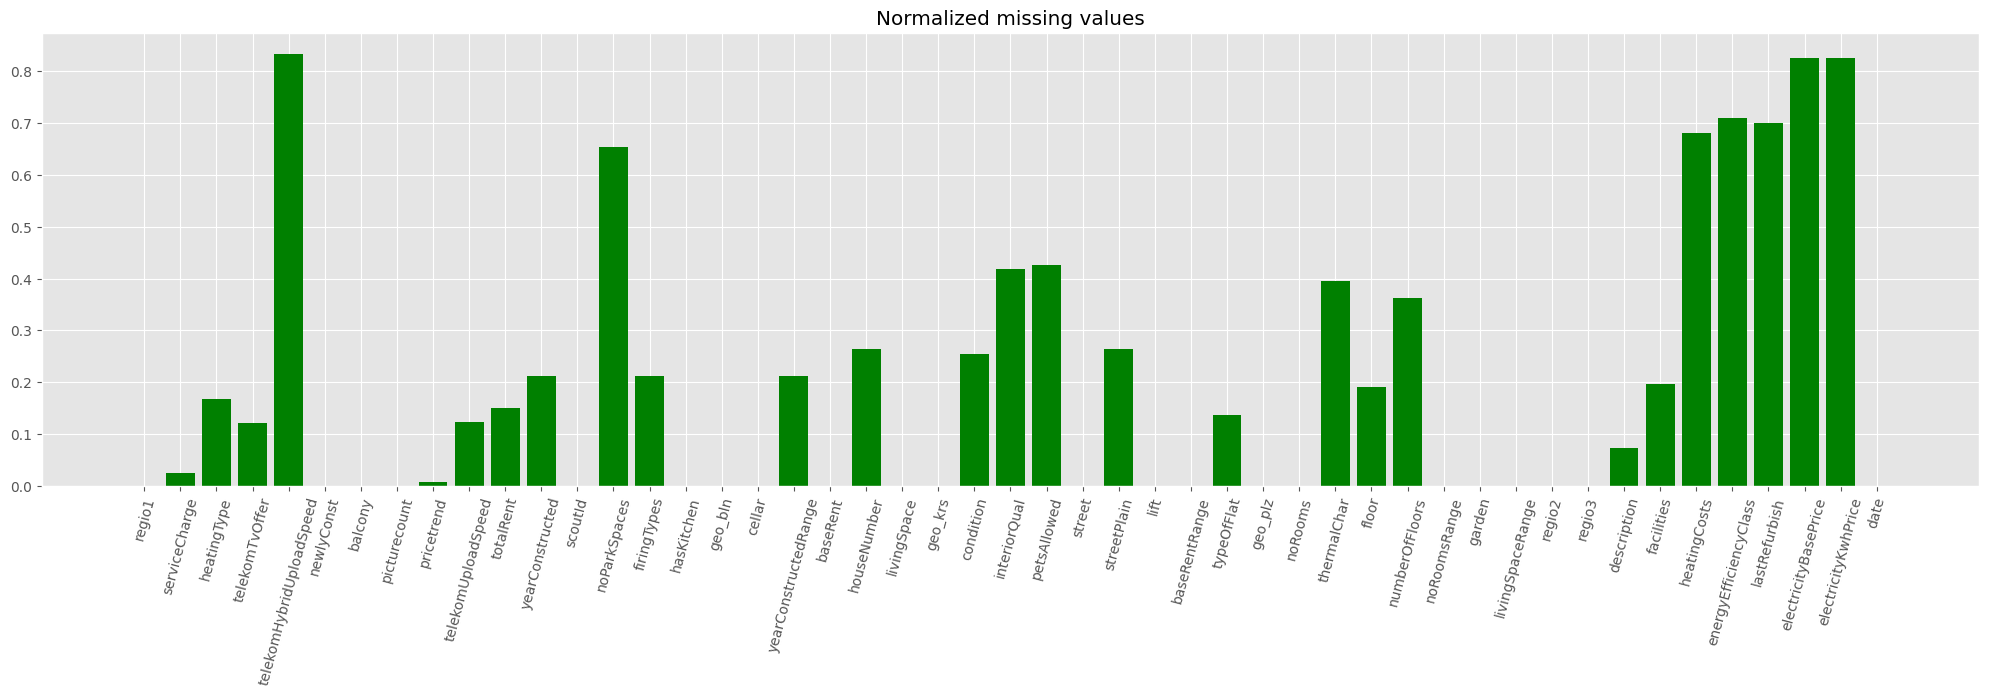

In [11]:
fig = plt.figure(figsize=(25,6),dpi=100)
plt.bar(nulls.index, nulls.values, color = "green")
plt.title('Normalized missing values')
plt.xticks(rotation=75)
plt.show()

In [12]:
# find duplications
duplications = dataset.drop(columns=["scoutId"])

In [13]:
duplications.duplicated().sum()

891

In [14]:
# class counts
counts  = dataset['regio1'].value_counts()

In [15]:
counts

Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

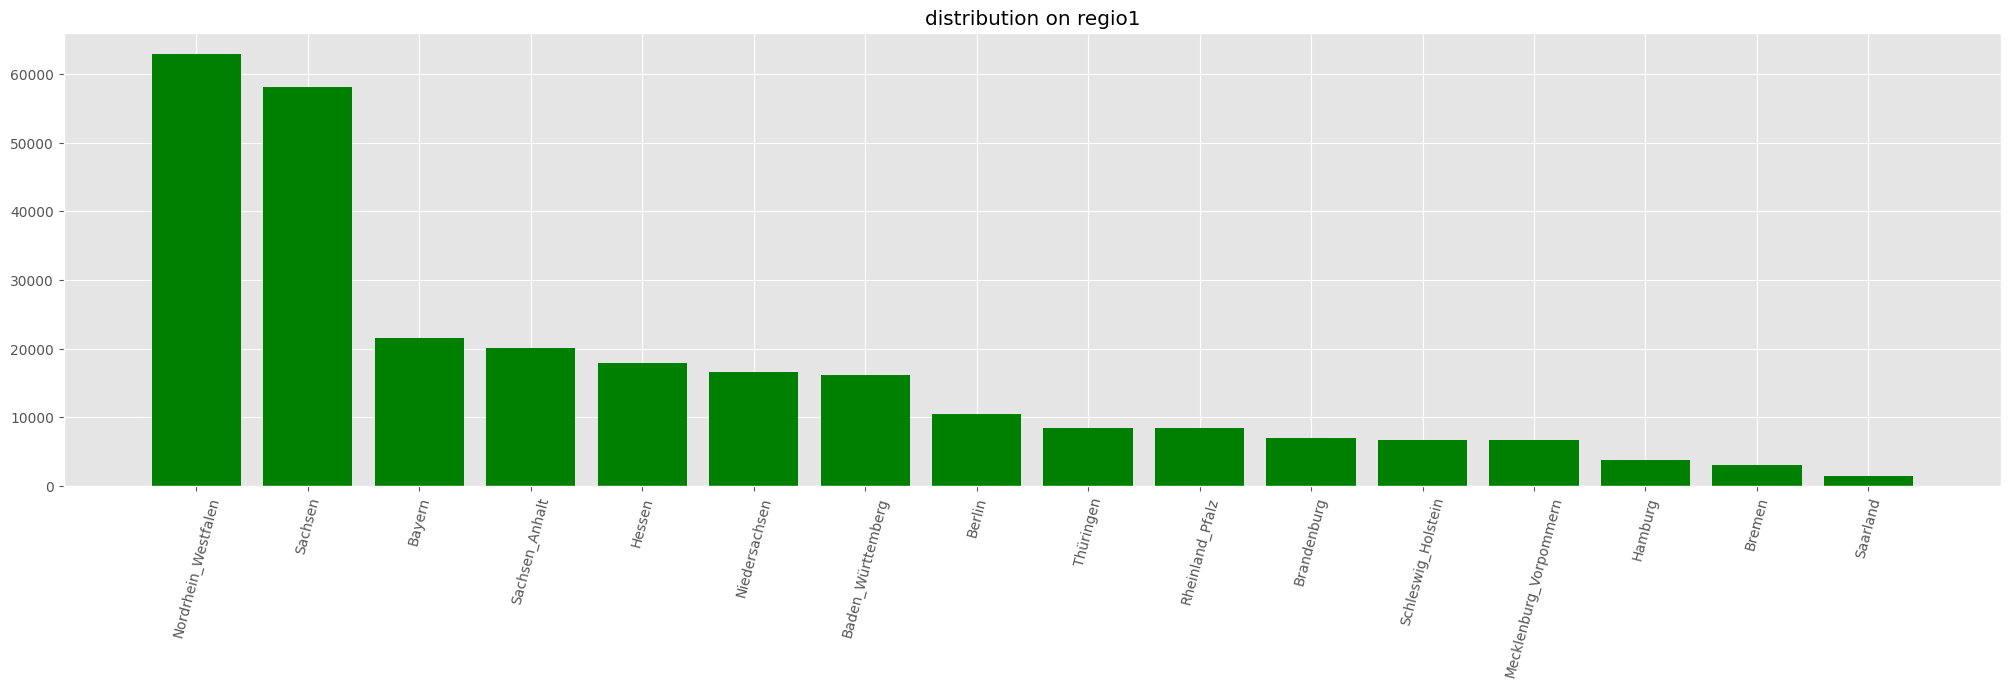

In [16]:
fig = plt.figure(figsize=(25,6),dpi=100)
plt.bar(counts.index, counts.values, color = "green")
plt.title('distribution on regio1')
plt.xticks(rotation=75)
plt.show()

In [17]:
dataset['baseRent']

0         595.0
1         800.0
2         965.0
3         343.0
4         765.0
          ...  
268845    820.0
268846    930.0
268847    650.0
268848    840.0
268849    935.0
Name: baseRent, Length: 268850, dtype: float64

# base rent 
analyse for base rent prices

In [ ]:
base_rent = dataset['baseRent']

In [ ]:
# is there any null value
base_rent_nulls =  base_rent.isna()
base_rent_nulls.sum()

# remove nulls
base_rent.dropna(inplace=True, how='any')

In [ ]:
base_rent

0         595.0
1         800.0
2         965.0
3         343.0
4         765.0
          ...  
268845    820.0
268846    930.0
268847    650.0
268848    840.0
268849    935.0
Name: baseRent, Length: 268850, dtype: float64

In [ ]:
base_rent.describe()

count    2.688500e+05
mean     6.941294e+02
std      1.953602e+04
min      0.000000e+00
25%      3.380000e+02
50%      4.900000e+02
75%      7.990000e+02
max      9.999999e+06
Name: baseRent, dtype: float64

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
base_rent.boxplot(column = base_rent.col)
plt.show()

AttributeError: ignored

<Figure size 800x560 with 0 Axes>

In [ ]:

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(base_rent)
plt.title("baseRent distribution")
plt.show()

In [ ]:
# boxplot
fig = plt.figure(figsize=(25,6),dpi=100)
dataset.boxplot(column='baseRent')
plt.title('baseRent')
plt.xticks(rotation=75)
plt.show()

In [ ]:
# base rent normalization
base_rent_normalized =np.log10(base_rent)

plt.figure(figsize=(10,7), dpi= 80)
plt.plot(base_rent_normalized)
plt.title("normalized baseRent distribution")
plt.show()

In [ ]:
# space range analysis
# plot dist
livingSpaceRange_hist = np.histogram(dataset['livingSpaceRange'], bins=7)
plt.figure(figsize=(10,7), dpi= 80)
plt.bar([1,2,3,4,5,6,7], height=livingSpaceRange_hist[0])
plt.plot([1,2,3,4,5,6,7],livingSpaceRange_hist[0], color='blue')
plt.title("livingSpaceRange distribution")
plt.show()

In [ ]:
livingSpaceRange_hist[1]

In [ ]:
dataset['livingSpaceRange'].value_counts()

In [ ]:
dataset['livingSpaceRange'].isna().sum()

# service charge

In [ ]:
#service charge
service_charge_uncleaned = pd.DataFrame(dataset['serviceCharge'], columns=['serviceCharge'])
service_charge_nulls = service_charge_uncleaned.isna()


# remove nulls 
service_charge = service_charge_uncleaned.dropna()


print(f"""size of original service charge is {service_charge_uncleaned.count()}\nthis contain {service_charge_nulls.sum()} number of null values and after deletation, {service_charge.isna().sum()} nan value were left.""")

size of original service charge is serviceCharge    260476
dtype: int64
this contain serviceCharge    8374
dtype: int64 number of null values and after deletation, serviceCharge    0
dtype: int64 nan value were left.


In [ ]:
service_charge.describe()

,serviceCharge
count,260476.000000
mean,151.227205
std,309.093976
min,0.000000
25%,95.000000
50%,135.000000
75%,190.000000
max,146118.000000


In [ ]:
# histogram of changes
service_charge_hist = np.histogram(service_charge,bins=260476)

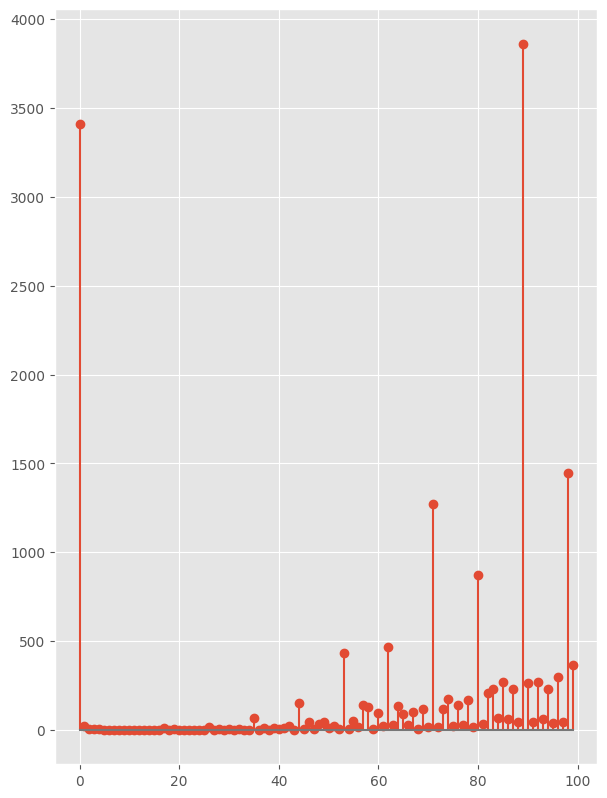

In [ ]:
plt.figure(figsize=(7,10), dpi=100)
plt.stem(service_charge_hist[0][:100], use_line_collection=True)
plt.show()

In [ ]:
# normalize
service_charge_mormalize  = pd.DataFrame(prep.normalize(service_charge), columns=['serviceCharge'])

In [ ]:
service_charge_mormalize.describe()

,serviceCharge
count,260476.000000
mean,0.986916
std,0.113634
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


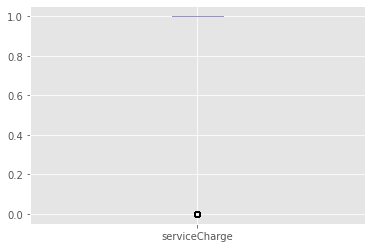

In [ ]:
sns.boxplot()

In [ ]:
# box plot
service_charge_df = pd.DataFrame(service_charge, columns=['service charge'])
service_charge_df.boxplot(column='service charge')
plt.show()

In [ ]:
service_charge_df = pd.DataFrame(service_charge, columns=['service charge'])

service_charge_df.plot.box()

TypeError: ignored

# pre processing

* handle outliere data
* remove features with lots of missing (drop cols)
* dealing with missing data

In [18]:
cols=  dataset.columns
print(cols)

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')


In [19]:
# concat address columns
address = dataset['regio1'] + dataset['regio2'] + dataset['regio3']
# replace adreess and drop address
dataset.insert(0, "address", address)

In [20]:
def create_dataset(original_dataset:pd.DataFrame, required_cols:list)->pd.DataFrame:
  
  new_dataframe = original_dataset[required_cols]

  return new_dataframe

In [21]:
required_cols = ['address','totalRent', 'scoutId' ]
new_dataset = create_dataset(dataset, required_cols)

In [51]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115047 entries, 2 to 268847
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    115047 non-null  object 
 1   totalRent  115047 non-null  float64
 2   scoutId    115047 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [47]:
# connect dataset to 
classes = new_dataset['address'].value_counts()
classes

SachsenChemnitzSonnenberg                                   1742
SachsenChemnitzKaßberg                                      1602
SachsenChemnitzHilbersdorf                                  1236
SachsenChemnitzSchloßchemnitz                               1199
Sachsen_AnhaltSaalekreisMerseburg                            868
                                                            ... 
Rheinland_PfalzBitburg_Prüm_KreisEchternacherbrück             1
BayernWunsiedel_im_Fichtelgebirge_KreisBad_Alexandersbad       1
Schleswig_HolsteinSchleswig_Flensburg_KreisNeuberend           1
BrandenburgSpree_Neiße_KreisTschernitz                         1
BayernWeilheim_Schongau_KreisEberfing                          1
Name: address, Length: 8813, dtype: int64

In [ ]:
# remove low data classes
classes = classes[classes > 100]
classes = list(classes.index)
classes

In [50]:
# update dataset with valid values 
new_dataset = new_dataset[new_dataset['address'].isin(classes)] # challenge: .isin

In [ ]:
# filter dataset based on regio2 
def regional_based_class(based_dataset:pd.DataFrame, filter='regio2') -> dict:
  
  # remove nans
  # new_dataset['regio2'].eq('').sum()

  # extract classes
  vlaues = dataset[filter].values
  
  classes = {}

  for cls in vlaues:
    classes.update({cls:based_dataset[based_dataset[filter]==cls]})
  
  return classes

In [ ]:
data_classes = regional_based_class(new_dataset)

* تجمیع داده های کم با داده های نزدیک تر و بزرگتر.
* ایجاد داده های بزرگتر و مهندسی ویژگی
---

* افزودن ویژگی موقعیت جغرافیایی و کلاسترینگ داده ها. 

In [ ]:
#splite tarin and test dataset
